Loading in the packages that will be used, and creating a mushrooms dataframe with pandas. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
path = '/content/gdrive/MyDrive/data/'
csv = 'mushrooms.csv'

In [5]:
mushrooms_raw = pd.read_csv(path + csv)
mushrooms_f = pd.read_csv(path + csv)

Here I am checking the data to see how it looks in the dataframe.

In [6]:
mushrooms_f.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [7]:
mushrooms_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Label encoder

In [8]:
mushrooms_f['class'].unique()


array(['p', 'e'], dtype=object)

In [9]:
mushrooms_f['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Upon inspection above all the variables are of type object. This will need to be changed. In example instead of 'e' for edible and 'p' for poisonous I will use 0 for edible and 1 for poisonous. This will be required for the machine learning algorithms to work. 

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder=LabelEncoder()

In [12]:
print(label_encoder)

LabelEncoder()


In [13]:

mappings = {} # to keep check of mappings
for column in mushrooms_f.columns:
        mushrooms_f[column] = label_encoder.fit_transform(mushrooms_f[column])
        encoder_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
        mappings[column] = encoder_mappings

After the changes we can now see that the data is in numeric form. 

In [14]:
mushrooms_f.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


Here I will load and be

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
X = mushrooms_f.drop('class', axis=1)

y= mushrooms_f['class']


Splitting the Data with a 70% train and a 30% test split

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3, random_state=0)

Training the Model

In [19]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

Test and Evaluate the model

In [20]:
y_pred=model.predict(X_test)
acc=model.score(X_test, y_test)
print(classification_report(y_test,y_pred), "Accuracy:", acc)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1272
           1       0.90      0.92      0.91      1166

    accuracy                           0.92      2438
   macro avg       0.91      0.92      0.91      2438
weighted avg       0.92      0.92      0.92      2438
 Accuracy: 0.9150943396226415


The Naive Bayes Model retuned an accuracy of 91.5% when categorizing edible vs poisonous mushrooms. Now I will try to beat these results using logistic regression.

Logistic Regression Train Test Evaluate

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
acc=log_reg.score(X_test, y_test)
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy: ", acc)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1272
           1       0.96      0.93      0.94      1166

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

Accuracy:  0.9466776045939295


In the above model I used Logistic Regression to categorize mushrooms as edible vs poisonous. The logisitic regression model was able to attain 94.6% accuracy. Below I will try to understand what the logistic regression model finds to be the most important variables when identifying edible vs poisonous mushrooms. 

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_reg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

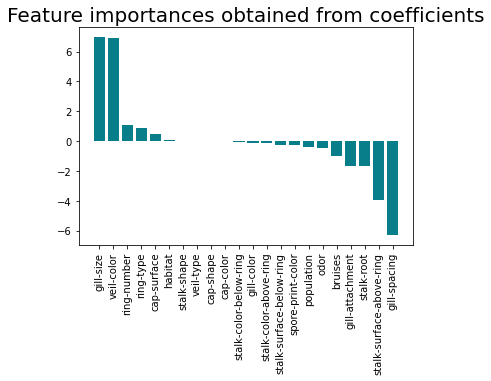

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

The variable/feature importance above, indicates that when identifying whether a mushroom was edible or poisonous the model found 'gill-size' and 'veil-color' to be the most important factors. Therefore studying these variables more we can see that gill size is described as either 'n' narrow or 'b' broad. We also see that veil color is described as 'w'=white, 'n'=brown, 'o'=orange, 'y'=yellow.


In [ ]:
mushrooms_raw['gill-size'].unique()


array(['n', 'b'], dtype=object)

In [ ]:
mushrooms_raw['veil-color'].unique()


array(['w', 'n', 'o', 'y'], dtype=object)

Now that we know according to the logisitic regression model that gill size and veil color are the most important indicators when determining whether our model categorizes a mushroom as edible or poisonous we can see whether it is narrow or broad gill size that is more associated with edible or poisonous mushrooms. 

In [22]:
gill_size = mushrooms_raw['gill-size'].value_counts()
m_height = gill_size.values.tolist() #Provides numerical values
gill_size.axes #Provides row labels
gill_size_labels = gill_size.axes[0].tolist() #Converts index object to list
ind=np.arange(2)
width =0.7

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

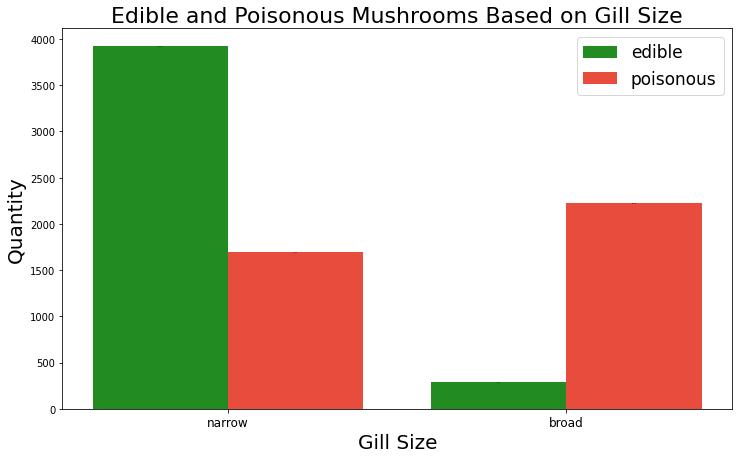

[3920, 288]
[1692, 2224]


In [23]:
poisonous_gs = [] #Poisonous gill-size list
edible_gs = []    #Edible gill_size list
for gillSize in gill_size_labels:
    size = len(mushrooms_raw[mushrooms_raw['gill-size'] == gillSize].index)
    edibles = len(mushrooms_raw[(mushrooms_raw['gill-size'] == gillSize) & (mushrooms_raw['class'] == 'e')].index)
    edible_gs.append(edibles)
    poisonous_gs.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_gs , width, color='#228B22')
poison_bars = ax.bar(ind+width, poisonous_gs , width, color='#E74C3C')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Size",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Gill Size',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('narrow', 'broad'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 2)
autolabel(poison_bars, 2)
plt.show()
print(edible_gs)
print(poisonous_gs)

Again, according to the logisitic regression model that gill size and veil color are the most important indicators when determining whether our model categorizes a mushroom as edible or poisonous. Here I will show whether any specific color of veils is more poisonous than others. 

In [26]:
veil_color = mushrooms_raw['veil-color'].value_counts()
m_height = veil_color.values.tolist() #Provides numerical values
veil_color.axes #Provides row labels
veil_color_labels = veil_color.axes[0].tolist() #Converts index object to list
ind=np.arange(4)
width =0.7

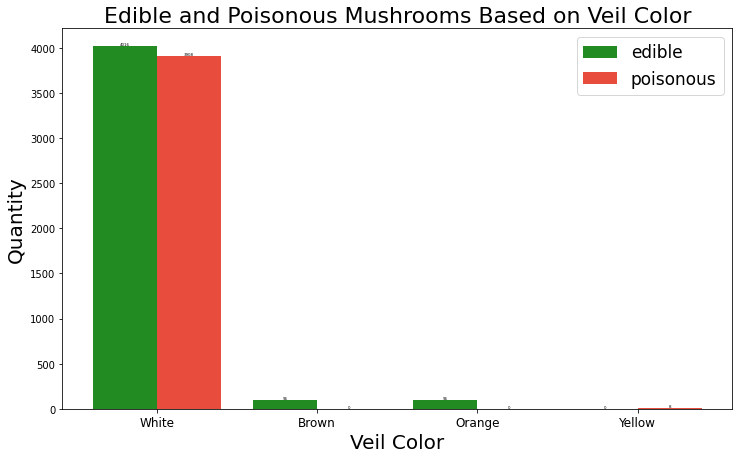

[3920, 288, 96, 96, 96, 96, 96, 96, 96, 96]
[1692, 2224, 0, 0, 0, 0, 0, 0, 0, 0]


In [30]:
poisonous_vc = [] 
edible_vc = []    
for veilColor in veil_color_labels:
    size = len(mushrooms_raw[mushrooms_raw['veil-color'] == veilColor].index)
    edibles = len(mushrooms_raw[(mushrooms_raw['veil-color'] == veilColor) & (mushrooms_raw['class'] == 'e')].index)
    edible_vc.append(edibles)
    poisonous_vc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_vc , width, color='#228B22')
poison_bars = ax.bar(ind+width, poisonous_vc , width, color='#E74C3C')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Veil Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Veil Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('White', 'Brown', 'Orange', 'Yellow'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 4)
autolabel(poison_bars, 4)
plt.show()
print(edible_gs)
print(poisonous_gs)

In conclusion I have used a machine learning model, logistic regression to categorize whether mushrooms are edible or poisonous. The model attained 95% accuracy in categorizing test data as edible or poisonous. Using that model I investigated and found that the variables the model found most important when categorizing the mushroom data as edible or poisonous was the gill size and veil color. From this information I used bar graphs to try and find if a specific gill size or veil color might be a clear indication whether a mushroom was edible or poisonous. 